In [282]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from itertools import islice
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

In [283]:
data = pd.read_csv("train.csv") #load training data
data.columns

Index(['Id', 'Tweet', 'following', 'followers', 'actions', 'is_retweet',
       'location', 'Type'],
      dtype='object')

In [284]:
data.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,FBBIGBANG&2NE1TH,Spam
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,www.instagram.com/fender,Spam


In [285]:
data['Type'].value_counts()

Quality    6153
Spam       5815
Name: Type, dtype: int64

In [286]:
data['Type'].value_counts(normalize=True)

Quality    0.514121
Spam       0.485879
Name: Type, dtype: float64

In [287]:
data.describe()

,Id,following,followers,actions,is_retweet
count,11968.000000,1.182300e+04,1.195200e+04,9195.000000,11967.000000
mean,6292.273730,4.787110e+03,3.668763e+05,7314.563893,0.223949
std,3632.510153,3.158289e+04,3.973314e+06,16468.215132,0.416906
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,3150.750000,0.000000e+00,0.000000e+00,10.000000,0.000000
50%,6289.500000,5.100000e+01,8.415000e+02,1487.000000,0.000000
75%,9442.250000,3.635000e+03,1.328775e+04,7265.500000,0.000000
max,12598.000000,1.600000e+06,1.050000e+08,165865.000000,1.000000


In [288]:
data.describe(exclude=[np.number])

,Tweet,location,Type
count,11968,10317,11968
unique,11787,2893,2
top,[HAPPY BIRTHDAY TAEYANG]\noriginally posted by...,United States,Quality
freq,10,2521,6153


In [289]:
Type = {'Spam': 1,'Quality': 0}
data.Type = [Type[item] for item in data.Type]

In [290]:
#Spliting the training data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(data["Tweet"], data["Type"], test_size=0.2)

In [291]:
print("Training Data: {}, Validation: {}".format(len(X_train), len(X_valid)))

Training Data: 9574, Validation: 2394


In [318]:
#vectorizing data
data_v = CountVectorizer(max_features=5000, binary=True, stop_words="english")

In [319]:
data_v.fit(X_train)
X_train_v = data_v.transform(X_train)
X_valid_v = data_v.transform(X_valid)

In [320]:
data_v.vocabulary_

{'video': 44,
 'watch': 46,
 'http': 13,
 'twitter': 43,
 'com': 5,
 'people': 28,
 'right': 32,
 'time': 40,
 'day': 6,
 'news': 26,
 'bit': 2,
 'ly': 21,
 'want': 45,
 'amp': 1,
 'https': 14,
 'status': 37,
 'pic': 29,
 'know': 16,
 'like': 19,
 'trump': 42,
 'breaking': 4,
 'thank': 38,
 'new': 25,
 'politics': 31,
 'www': 48,
 'man': 23,
 'don': 7,
 'got': 10,
 'today': 41,
 'just': 15,
 'world': 47,
 'black': 3,
 'happy': 11,
 'love': 20,
 'rt': 33,
 'obama': 27,
 'says': 35,
 'need': 24,
 'year': 49,
 'fb': 8,
 'make': 22,
 'life': 18,
 'sports': 36,
 'let': 17,
 'say': 34,
 'think': 39,
 '2016': 0,
 'police': 30,
 'hillary': 12,
 'good': 9}

In [317]:
list(islice(data_v.vocabulary_.items(), 20))

[('idol', 2199),
 ('singer', 4020),
 ('successful', 4263),
 ('fan', 1632),
 ('sones', 4092),
 ('proud', 3462),
 ('fandom', 1634),
 ('ijwd1stwin', 2210),
 ('video', 4735),
 ('watch', 4809),
 ('goals', 1903),
 ('helped', 2061),
 ('jonathan', 2406),
 ('receive', 3586),
 ('http', 2161),
 ('youtu', 4983),
 ('everybody', 1558),
 ('follow', 1747),
 ('instagram', 2286),
 ('amazing', 290)]

In [238]:
#logistic regression
model= LogisticRegression(C=0.3)
model.fit(X_train_v, y_train)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [239]:
print("Training Acc: {:.4f}".format(model.score(X_train_v, y_train)))
print("Validation Acc: {:.4f}".format(model.score(X_valid_v, y_valid)))

Training Acc: 0.9587
Validation Acc: 0.9273


In [240]:
data_test=pd.read_csv("test.csv")
data_test.head()

,Id,Tweet,following,followers,actions,is_retweet,location
0,8536,Obama Criminal Enterprise Collapsing https://...,10.0,4,1214.0,0,UP THRU DERE!
1,5214,I only learned to dream in sound #love,63.0,55,508.0,0,"Johannesburg, South Africa"
2,7437,Cause I ain't trying to out here thinking you ...,0.0,0,0.0,0,NaN
3,10009,When will they get that it's about #Liberty ? ...,2310.0,2736,32188.0,1,"Shreveport, LA"
4,4672,GM UAW workers to receive profit-sharing up to...,696.0,176,713.0,1,EVERYWHERE


In [241]:
ytest = np.array(y_valid)# confusion matrix and classification report(precision, recall, F1-score)

In [242]:
print(classification_report(ytest, model.predict(X_valid_v)))
print(confusion_matrix(ytest, model.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1221
           1       0.96      0.89      0.92      1173

   micro avg       0.93      0.93      0.93      2394
   macro avg       0.93      0.93      0.93      2394
weighted avg       0.93      0.93      0.93      2394

[[1181   40]
 [ 134 1039]]


In [243]:
predictions_NN_prob = model.predict(X_valid_v)

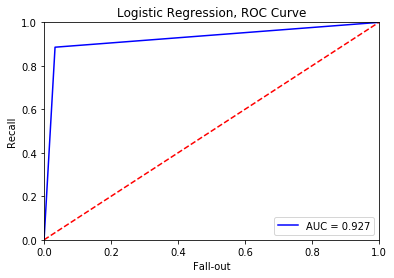

In [244]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob)
roc_auc1 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Logistic Regression, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()


In [245]:
#Gradient Boosted Trees
model_gb = RandomForestClassifier(min_samples_leaf=3, n_estimators=25, n_jobs=-1)
model_gb.fit(X_train_v, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [246]:
print("Training Accuracy: {:.3f}".format(model_gb.score(X_train_v, y_train)))
print("Validation Accuracy: {:.3f}".format(model_gb.score(X_valid_v, y_valid)))

Training Accuracy: 0.943
Validation Accuracy: 0.924


In [247]:
print(classification_report(ytest, model_gb.predict(X_valid_v)))
print(confusion_matrix(ytest, model_gb.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1221
           1       0.97      0.87      0.92      1173

   micro avg       0.92      0.92      0.92      2394
   macro avg       0.93      0.92      0.92      2394
weighted avg       0.93      0.92      0.92      2394

[[1188   33]
 [ 149 1024]]


In [248]:
predictions_NN_prob1 = model_gb.predict(X_valid_v)

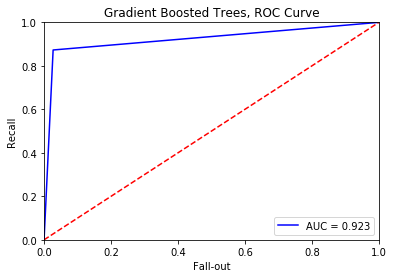

In [249]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob1)
roc_auc2 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Gradient Boosted Trees, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [250]:
#Random Forest
model_rm = RandomForestClassifier(min_samples_leaf=3, n_estimators=25, n_jobs=-1)
model_rm.fit(X_train_v, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [251]:
# Training Accuracy
print("Training Accuracy: {:.3f}".format(model_rm.score(X_train_v, y_train)))
print("Validation Accuracy: {:.3f}".format(model_rm.score(X_valid_v, y_valid)))

Training Accuracy: 0.940
Validation Accuracy: 0.924


In [252]:
print(classification_report(ytest, model_rm.predict(X_valid_v)))
print(confusion_matrix(ytest, model_rm.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1221
           1       0.97      0.87      0.92      1173

   micro avg       0.92      0.92      0.92      2394
   macro avg       0.93      0.92      0.92      2394
weighted avg       0.93      0.92      0.92      2394

[[1189   32]
 [ 149 1024]]


In [253]:
predictions_NN_prob2 = model_rm.predict(X_valid_v)

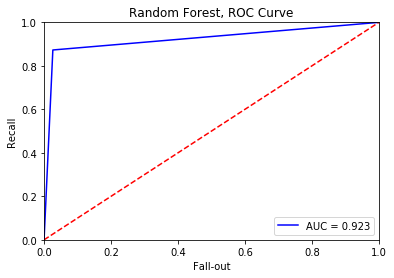

In [254]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob2)
roc_auc3 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Random Forest, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc3)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [255]:
#support vector machine
scaler = MaxAbsScaler()

In [256]:
X_train_scaled = scaler.fit_transform(X_train_v)
X_valid_scaled = scaler.fit_transform(X_valid_v)

In [257]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on validation set: {:.3f}".format(svc.score(X_valid_scaled, y_valid)))

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy on training set: 0.980
Accuracy on validation set: 0.934


In [258]:
print(classification_report(ytest, svc.predict(X_valid_v)))
print(confusion_matrix(ytest, svc.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1221
           1       0.96      0.90      0.93      1173

   micro avg       0.93      0.93      0.93      2394
   macro avg       0.94      0.93      0.93      2394
weighted avg       0.94      0.93      0.93      2394

[[1182   39]
 [ 118 1055]]


In [259]:
predictions_NN_prob3 = svc.predict(X_valid_v)

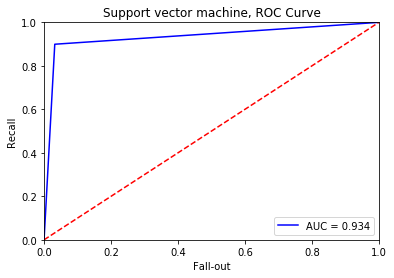

In [260]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob3)
roc_auc4 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Support vector machine, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc4)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [261]:
#k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_v, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train_v, y_train)))
print('Accuracy of K-NN classifier on validation set: {:.2f}'.format(knn.score(X_valid_v, y_valid)))

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on validation set: 0.81


In [262]:
print(classification_report(ytest, knn.predict(X_valid_v)))
print(confusion_matrix(ytest, knn.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83      1221
           1       0.92      0.67      0.77      1173

   micro avg       0.81      0.81      0.81      2394
   macro avg       0.83      0.81      0.80      2394
weighted avg       0.83      0.81      0.81      2394

[[1150   71]
 [ 386  787]]


In [263]:
predictions_NN_prob4 = knn.predict(X_valid_v)

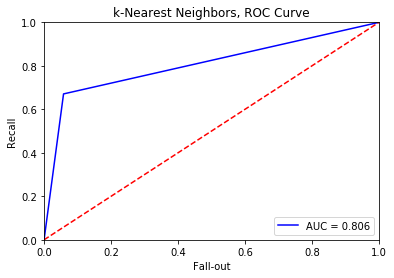

In [264]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob4)
roc_auc5 = auc(false_positive_rate, recall)
plt.figure()
plt.title('k-Nearest Neighbors, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc5)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [265]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

print('')
#k-Nearest Neighbors
printmd("**k-Nearest Neighbors**")
print('Training Acc: {:.2f}'.format(knn.score(X_train_v, y_train)))
print('Validation Acc: {:.2f}'.format(knn.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc5))
print('')
print(classification_report(ytest, knn.predict(X_valid_v)))


print('')
#Logistic Regression
printmd("**Logistic Regression**")
print("Training Acc: {:.4f}".format(model.score(X_train_v, y_train)))
print("Validation Acc: {:.4f}".format(model.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc1))
print('')
print(classification_report(ytest, model.predict(X_valid_v)))


print('')
#Random Forest
printmd("**Random Forest**")
print("Training Acc: {:.3f}".format(model_rm.score(X_train_v, y_train)))
print("Validation Acc: {:.3f}".format(model_rm.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc3))
print('')
print(classification_report(ytest, model_rm.predict(X_valid_v)))

print('')
#Gradient Boosting
printmd("**Gradient Boosting**")
print("Training Acc: {:.3f}".format(model_gb.score(X_train_v, y_train)))
print("Validation Acc: {:.3f}".format(model_gb.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc2))
print('')
print(classification_report(ytest, model_gb.predict(X_valid_v)))

print('')
#Support Vector Machine
printmd("**Support Vector Machine**")
print("Training Acc: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Validation Acc: {:.3f}".format(svc.score(X_valid_scaled, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc4))
print('')
print(classification_report(ytest, svc.predict(X_valid_v)))

**k-Nearest Neighbors**

Training Acc: 0.88
Validation Acc: 0.81
AUC Value: 0.806

              precision    recall  f1-score   support

           0       0.75      0.94      0.83      1221
           1       0.92      0.67      0.77      1173

   micro avg       0.81      0.81      0.81      2394
   macro avg       0.83      0.81      0.80      2394
weighted avg       0.83      0.81      0.81      2394




**Logistic Regression**

Training Acc: 0.9587
Validation Acc: 0.9273
AUC Value: 0.927

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1221
           1       0.96      0.89      0.92      1173

   micro avg       0.93      0.93      0.93      2394
   macro avg       0.93      0.93      0.93      2394
weighted avg       0.93      0.93      0.93      2394




**Random Forest**

Training Acc: 0.940
Validation Acc: 0.924
AUC Value: 0.923

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1221
           1       0.97      0.87      0.92      1173

   micro avg       0.92      0.92      0.92      2394
   macro avg       0.93      0.92      0.92      2394
weighted avg       0.93      0.92      0.92      2394




**Gradient Boosting**

Training Acc: 0.943
Validation Acc: 0.924
AUC Value: 0.923

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1221
           1       0.97      0.87      0.92      1173

   micro avg       0.92      0.92      0.92      2394
   macro avg       0.93      0.92      0.92      2394
weighted avg       0.93      0.92      0.92      2394




**Support Vector Machine**

Training Acc: 0.980
Validation Acc: 0.934
AUC Value: 0.934

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1221
           1       0.96      0.90      0.93      1173

   micro avg       0.93      0.93      0.93      2394
   macro avg       0.94      0.93      0.93      2394
weighted avg       0.94      0.93      0.93      2394

